In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from pylatexenc import *
from qiskit_aer import AerSimulator

In [2]:
qc = QuantumCircuit(17,5)

In [3]:
#|a> = (|0000> + |0111>)/sqrt(2)
qc.x(10)
qc.h(6)
qc.cx(6,10)

#|b> = (|1011> + |0001>)/sqrt(2)
qc.x(3)
qc.h(15)
qc.cx(15,7)

qc.barrier()

In [4]:
# Generation and Propagation
qc.ccx(2,3,1)
qc.cx(3,2)
qc.ccx(6,7,5)
qc.cx(7,6)
qc.ccx(10,11,9)
qc.cx(11,10)
qc.ccx(14,15,13)
qc.cx(15,14)
qc.barrier()

In [5]:
# Carry
qc.cx(1,4)
qc.mcx([0,2],4)
qc.barrier()
qc.cx(5,8)
qc.mcx([1,6],8)
qc.mcx([0,2,6],8)
qc.barrier()
qc.cx(9,12)
qc.mcx([5,10],12)
qc.mcx([1,6,10],12)
qc.mcx([0,2,6,10],12)
qc.barrier()
qc.cx(13,16)
qc.mcx([9,14],16)
qc.mcx([5,10,14],16)
qc.mcx([1,6,10,14],16)
qc.mcx([0,2,6,10,14],16)
qc.barrier()

In [6]:
# Sum
qc.cx(0,2)
qc.cx(4,6)
qc.cx(8,10)
qc.cx(12,14)
qc.barrier()

In [7]:
qc.measure(2,0)
qc.measure(6,1)
qc.measure(10,2)
qc.measure(14,3)
qc.measure(16,4)

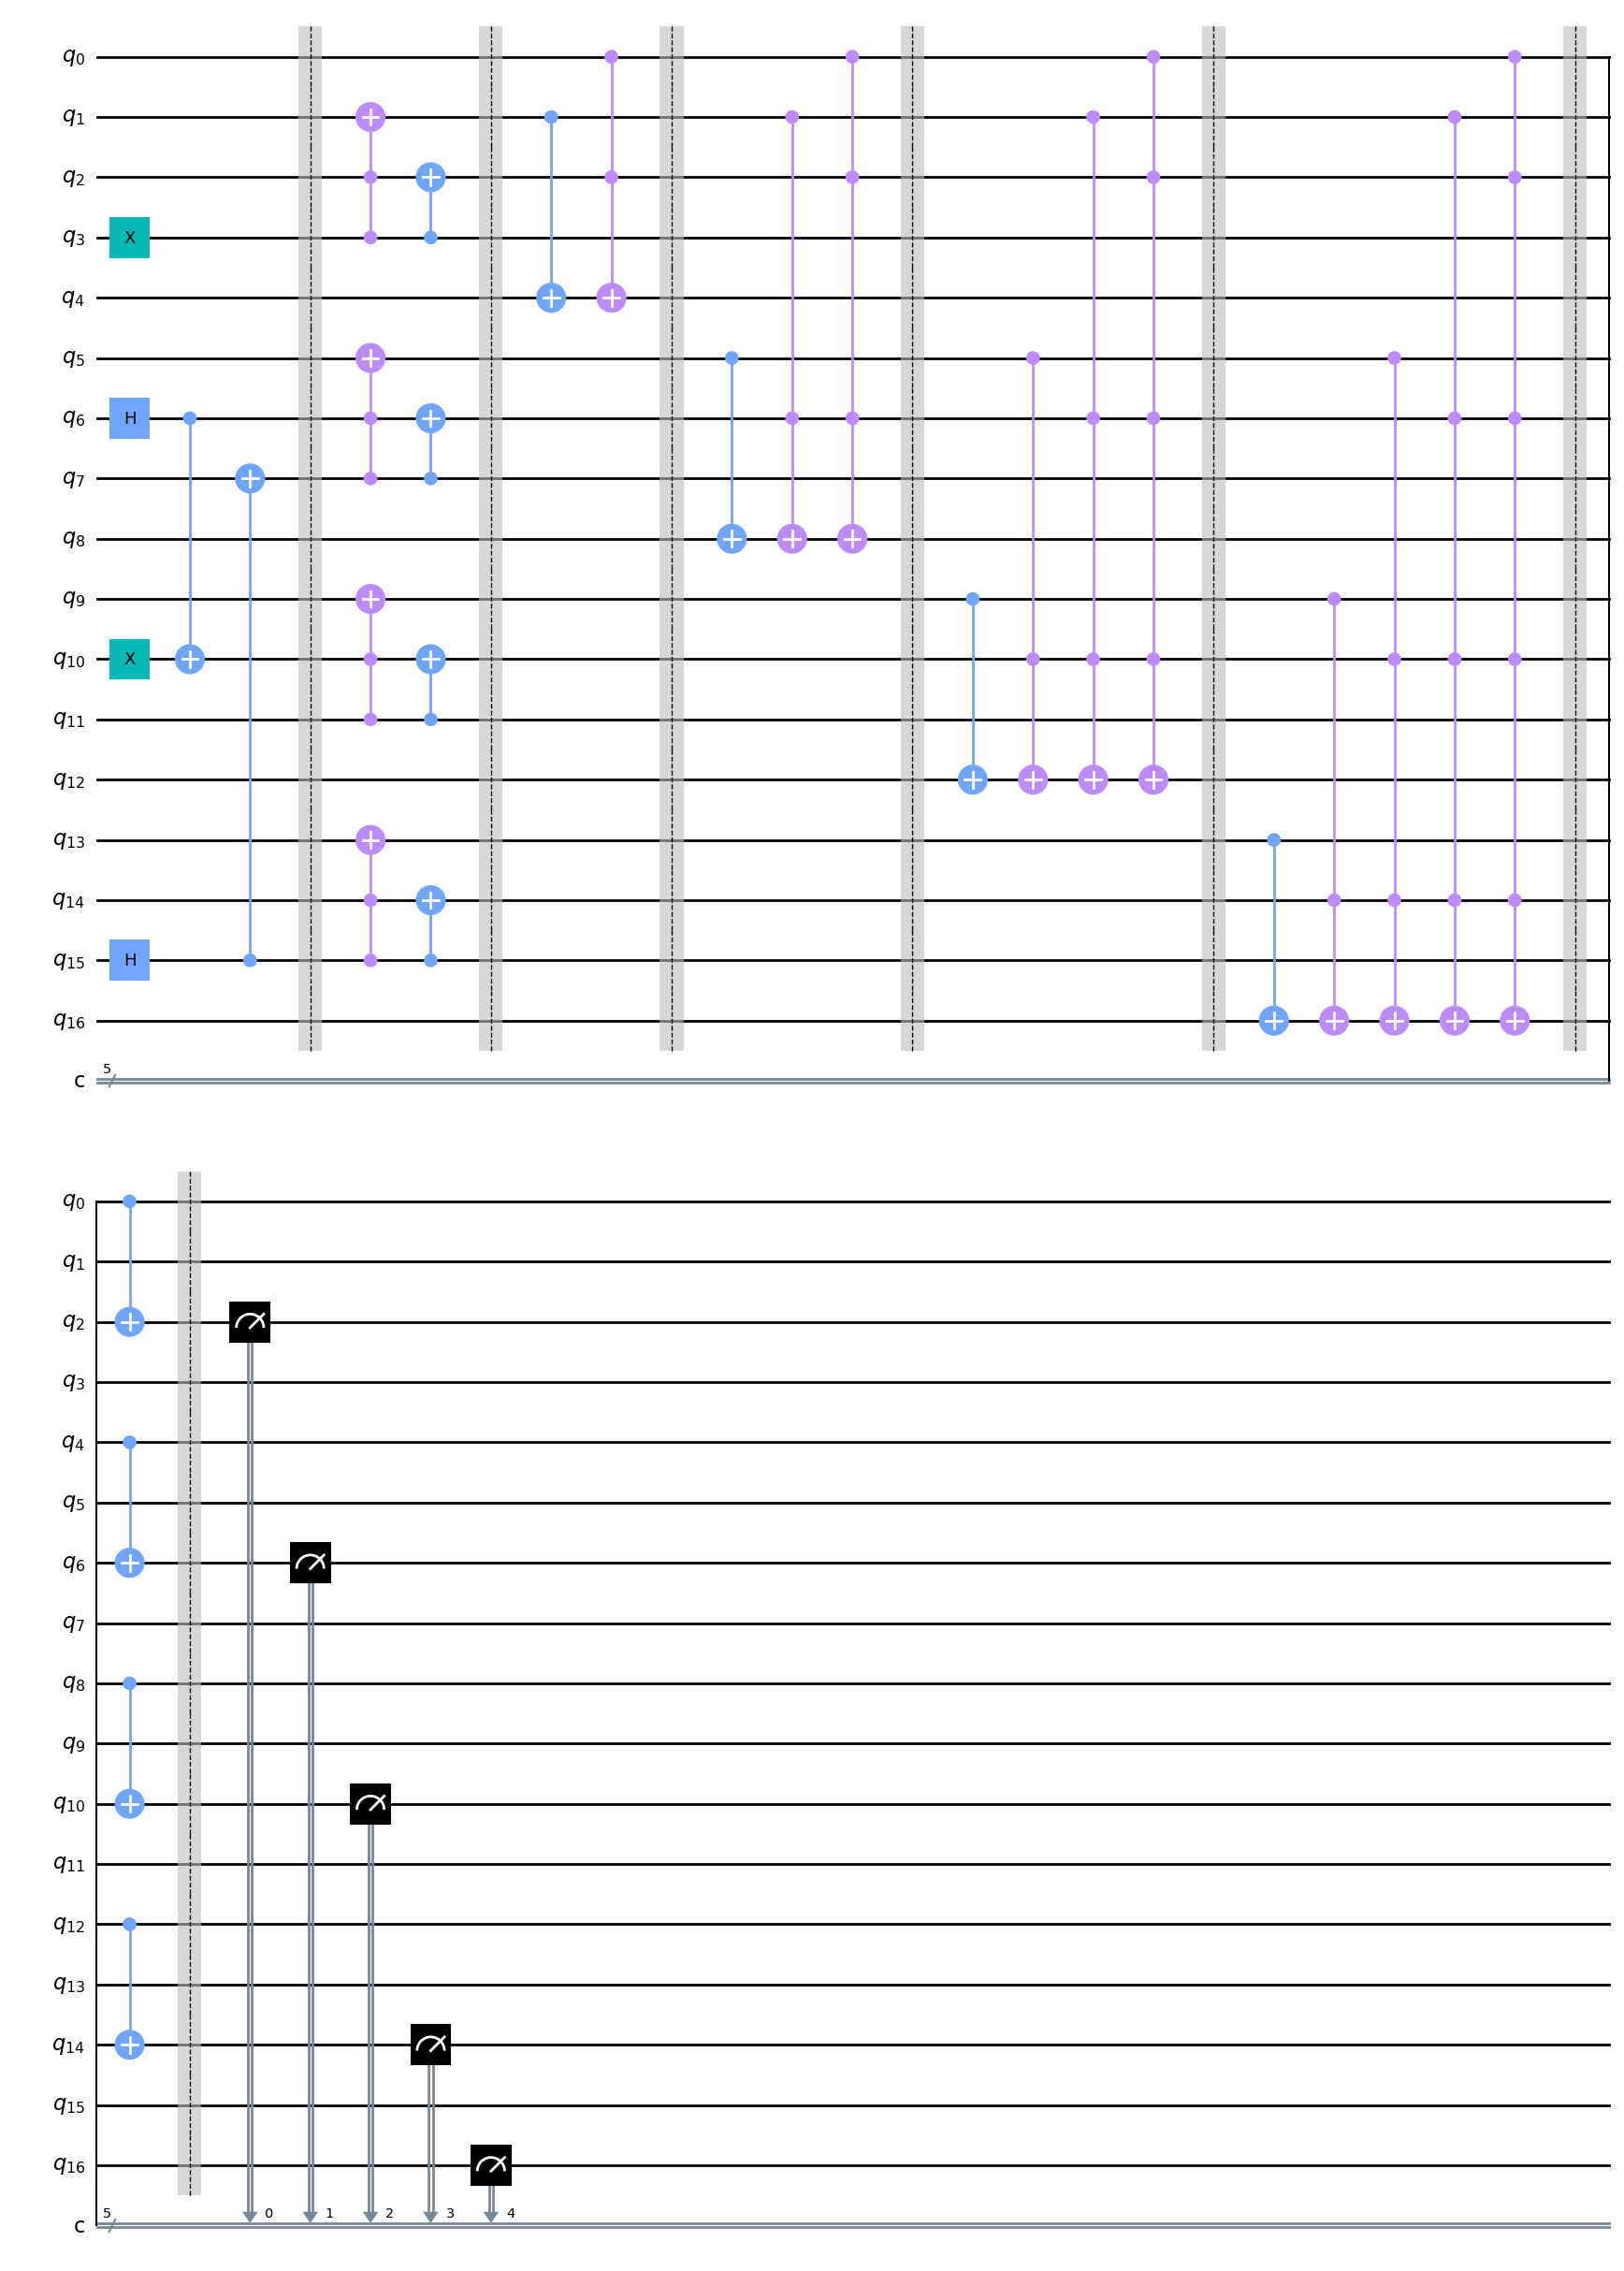

In [8]:
qc.draw(output='mpl')

In [9]:
state_sim = Aer.get_backend("qasm_simulator")
job = execute(qc, state_sim)
counts = job.result().get_counts(qc)

print(counts)

{'01101': 246, '00011': 271, '00101': 258, '01111': 249}


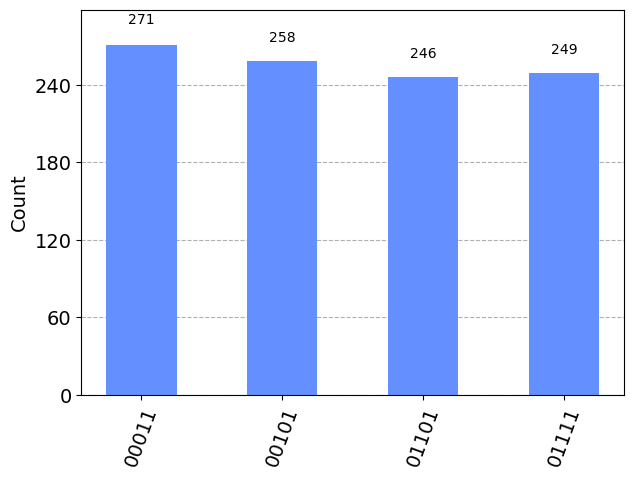

In [10]:
plot_histogram(counts)